In [20]:
from utils import *

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import torch
import torch.nn as nn

import matplotlib.pyplot as plt

# Define the model
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(26, 256),   
    nn.ReLU(),
    nn.Dropout(0.8),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(128, 64),   
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(64, 40),   
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(40, 1),   
)


print(model)

# Parameters
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

combined = numerize_csv('train.csv', expand_classes=True)

#Data
Y = combined['Discontinued']
X = combined.drop('Discontinued', axis=1)  
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, train_size = .75)

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)  
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32) 

y_train_tensor = y_train_tensor.view(-1, 1) 
y_test_tensor = y_test_tensor.view(-1, 1)

test_scores = []
train_scores = []

# Training
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()  
    optimizer.zero_grad()  

    outputs = model(X_train_tensor) 
    loss = loss_fn(outputs, y_train_tensor)
    train_scores.append(roc_auc_score(y_train_tensor.detach().numpy(), outputs.detach().numpy()))
    loss.backward()  
    optimizer.step() 
    model.eval() 
    with torch.no_grad():
        outputs = model(X_test_tensor)
        # test_loss = loss_fn(outputs, y_test_tensor)
        test_scores.append(roc_auc_score(y_test_tensor, outputs))

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=26, out_features=256, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.8, inplace=False)
  (4): Linear(in_features=256, out_features=128, bias=True)
  (5): ReLU()
  (6): Dropout(p=0.5, inplace=False)
  (7): Linear(in_features=128, out_features=64, bias=True)
  (8): ReLU()
  (9): Dropout(p=0.2, inplace=False)
  (10): Linear(in_features=64, out_features=40, bias=True)
  (11): ReLU()
  (12): Dropout(p=0.2, inplace=False)
  (13): Linear(in_features=40, out_features=1, bias=True)
)


0.860234626070144

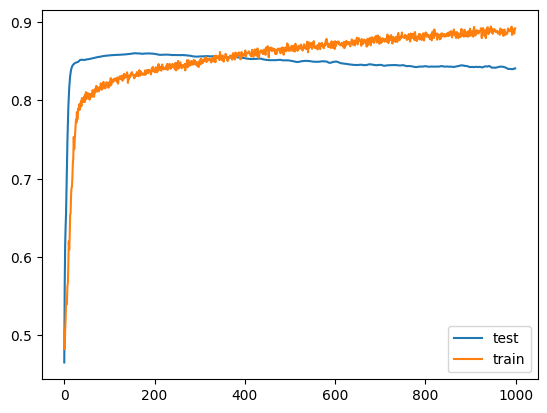

In [21]:
plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend()
max(test_scores)